In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#upload file from the path and saving it as data
data = pd.read_csv("C:/Users/surya/anaconda3/FILES_CSV/Assignments/SIMPLE_LIN_REGRESSION/Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#checking any duplicate row
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

In [5]:
#describing the data
print(data['Salary'].describe())


count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64


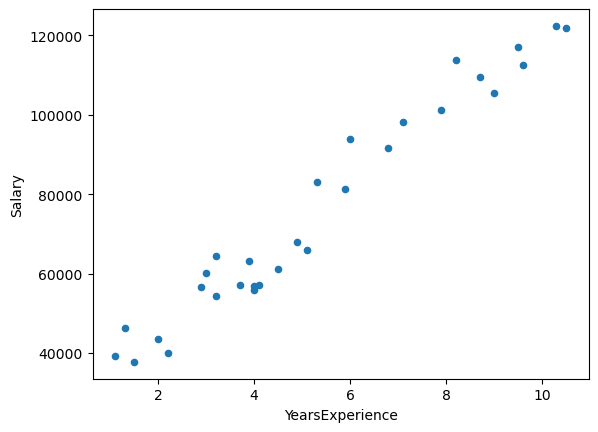

In [7]:
#scatter plot - VISUALIZATION
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
data.plot(kind = 'scatter', x = 'YearsExperience', y = 'Salary')

plt.show()

In [8]:
#FIND CORRELATION COEFF BT THE VAIABLES
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

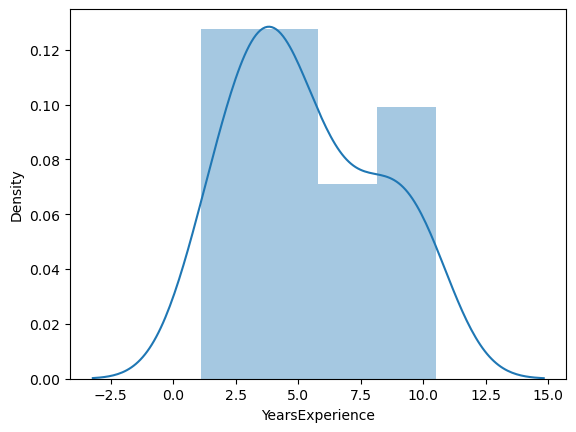

In [10]:
#DISTPLOT:
sns.distplot(data['YearsExperience'])

C:\Users\surya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

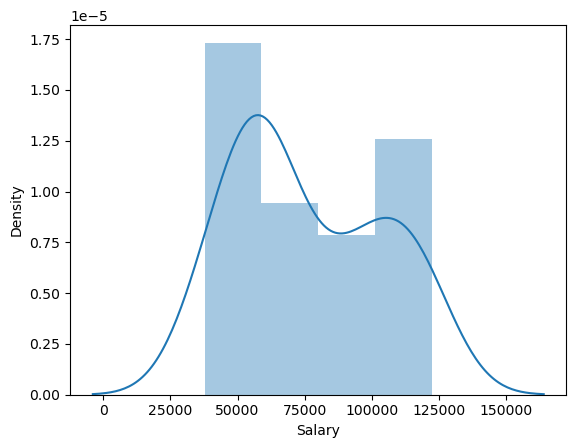

In [11]:
#DISTPLOT:
sns.distplot(data['Salary'])

In [13]:
#fitting a Regression model
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

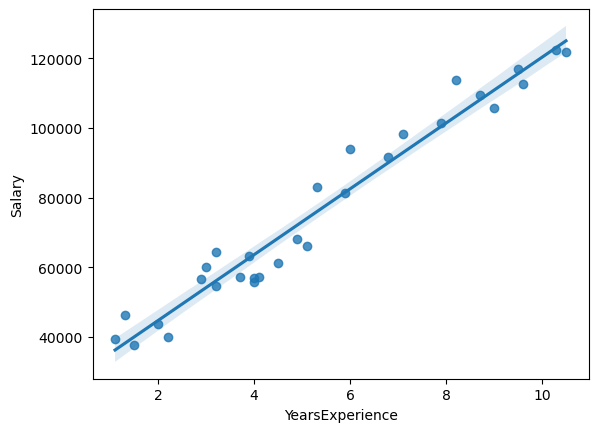

In [14]:
sns.regplot(x='YearsExperience', y='Salary', data=data)

In [15]:
#coeff
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [16]:
#r-squared
(model.rsquared)

0.9569566641435086

In [17]:
#p-values and t values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [18]:
#predict salary for 5 and 8 years of exp
newdata = pd.Series([5, 8])

In [22]:
#construct data frame for our inputs
data_pred = pd.DataFrame(newdata, columns= ['YearsExperience'])

In [23]:
model.predict(data_pred)

0     73042.011806
1    101391.898770
dtype: float64

In [24]:
#predicted salary:
#5 years = 73042.011806
#8 years = 101391.898770